# Machine Learnig for Physicists

## Convolutional network

What convolutions are about?

We assume that we have a function $F(x)$ and do the operation of kerenel K() which depends only on the difference of coordinates where the translational invariance enters. Around each point $x^{'}$ there is a zone of influence that depends on how fast the kernel falls off and it will contribute in the convolution operation at new value at position x.   

 $F^{new}(x) = \int K(x-x^{'}) F(x^{'})dx^{'}$
 
 In physics it is Green's function for linear partial functional equations. We can get new wave profile out of the old wave profile by doing convolution operation. 
 
 It is also very important in signal filtering. 
 
 In convolution neural network we want to move a situation where we wnat to exploit translational invariance. Here in simple structure of a convolutional layer, what happens if we apply this convolution or filter or kernel concept on NN. The value of the neuron in the new layer should probabily only be determined by the values of the nuerons in the vicinity in lower layer. There is a certain region of influence that is called a size of the kernel/filter. The weights define the filter. The idea is now that we have the smae structure for all the other neurons as well, but the values of the weight for the other connections also are the same. 
 
 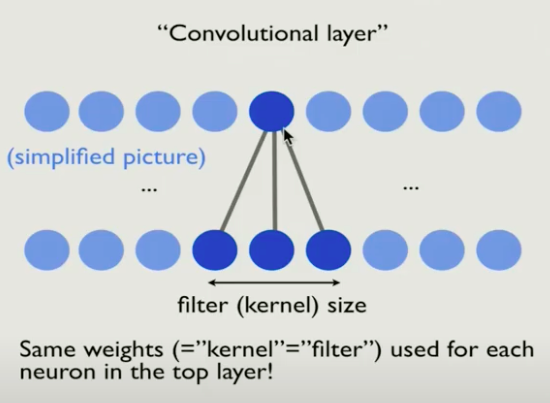

In convolutional NN the number of weights scales with the size of the kerbel. for example if the size of kernel is 3x3 that means there are 9 pixels. Kernel size is independent of the size of image. 

in keras:
2D convolutional layer
input :  NxN image only one channel
here instead of Dense (fully connected) we use Conv2D. We spesify input shape (N,N,1) that means we have NxN image and we have to spesify third one for channels, images with red,green,blue colors have 3 channels, grayscale images have only one channel. We have to spesify how many filters we have,i.e. how many channels we have to generate. out of one imput image we will generate 20 images in the next layer. Then we have to spesify how large is our filter (kernel size). There is one option that say what happens at the boundaries of the image at the borders at the edges. 
We know that each pixel has to reach out to its neighborhood and pick up the values from its neigborhood but what we do with a pixel that sits at the edge of the image because its neighborhood cuts into two (three). One thing we can assume is that all the pixels that are outside of the actual image will be counted as if they have zero value. 

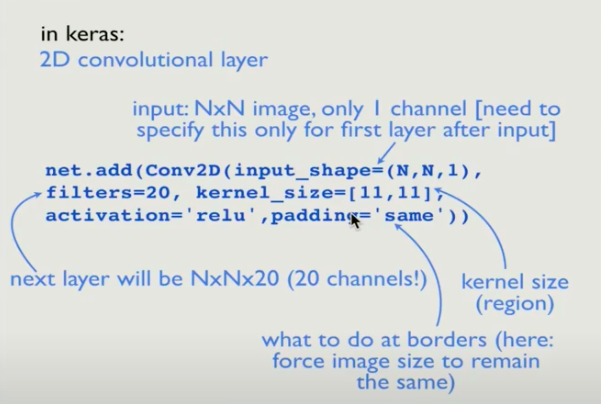

We can stack several of convolutional layers one above the other. 

There are other tricks we can apply and all are implemented in keras. One is that to reduce the resulotion of our image. Because the number of neurons get smaller. 
This is called average pooling where we take manty pixels and calculate average pixel value and then replace many pixels by a single pixel which automatically will get smaller.

There is possibility to larger the image size using this option:

net.add(UpSampleing2D(size=8))

where a single pixel will turn into 8x8 grid.

People design such a neural network that become more and more complex. 

Here in this picture there are three filters and subsampling where reduce the resolution ofimage. In the next step there are some channels that it is not necessary to be the same in the first step. 
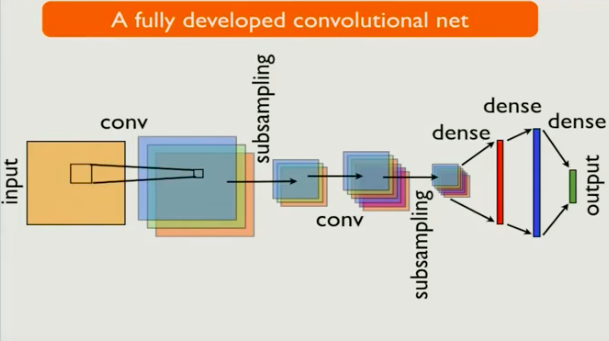


What do we actually calculate in the detail when we do cahnging channel zise?

One pixel here in this blue channel gets its contributions from (when we have three channels in preceding layer) all these channel. There will be a different kernel for each of these channels. There will be a kernel for each combination of the channels 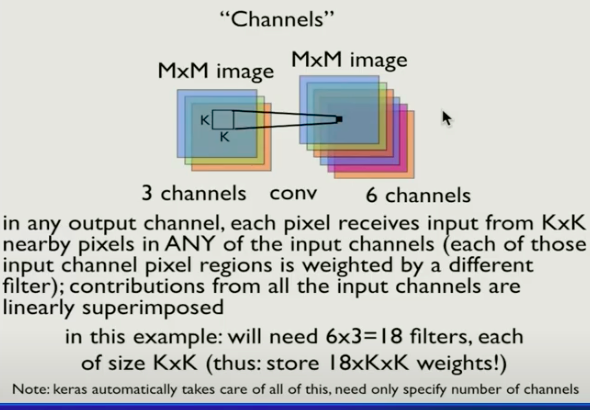

We can apply CNN to the example of handwritten digits recognation, the input images sre in size of 28x28 pixels then we do convolution that we have several channels and also down sample the resolution (28/4 = 7). Finally we switch to fully connected layers. We have arbitrary linear functions (maybe relu) but at the end we pick softmax for the output because it gives us probability distribution. 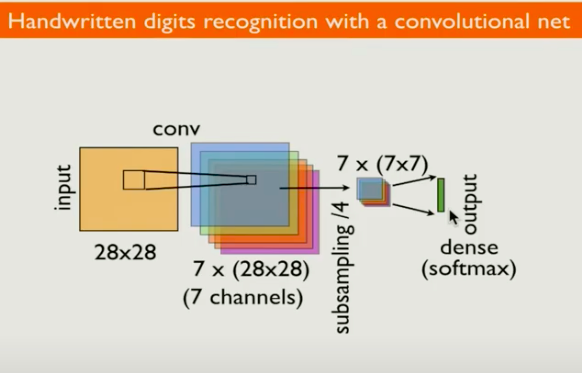  

We implement the NN that was shown in the picture above. Our NN is the sequential type that means one layer after the other layer. We do the convolution layer for 2D image, specify the shape of our input image (MxM), 7 filters, kernel size 5x5, then we want to down sample by the factor of 4. Then we have an operation called flatten when we want to switch from CNN to fully connected NN. It is also in numpy and it means we can go from a matrix to a vector (instead of a structure that looks like an image we just put all the neurons one after the other and it becomes just one long list of numbers). We have our output layer with 10 neurons and somax activation.   
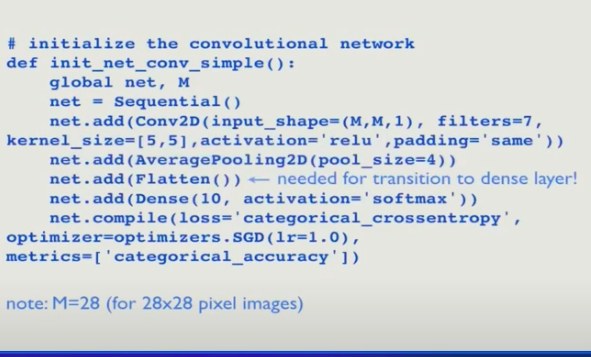

## Play with kernel 

In [3]:
import numpy as np

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

from scipy import ndimage # for image loading/processing
import imageio

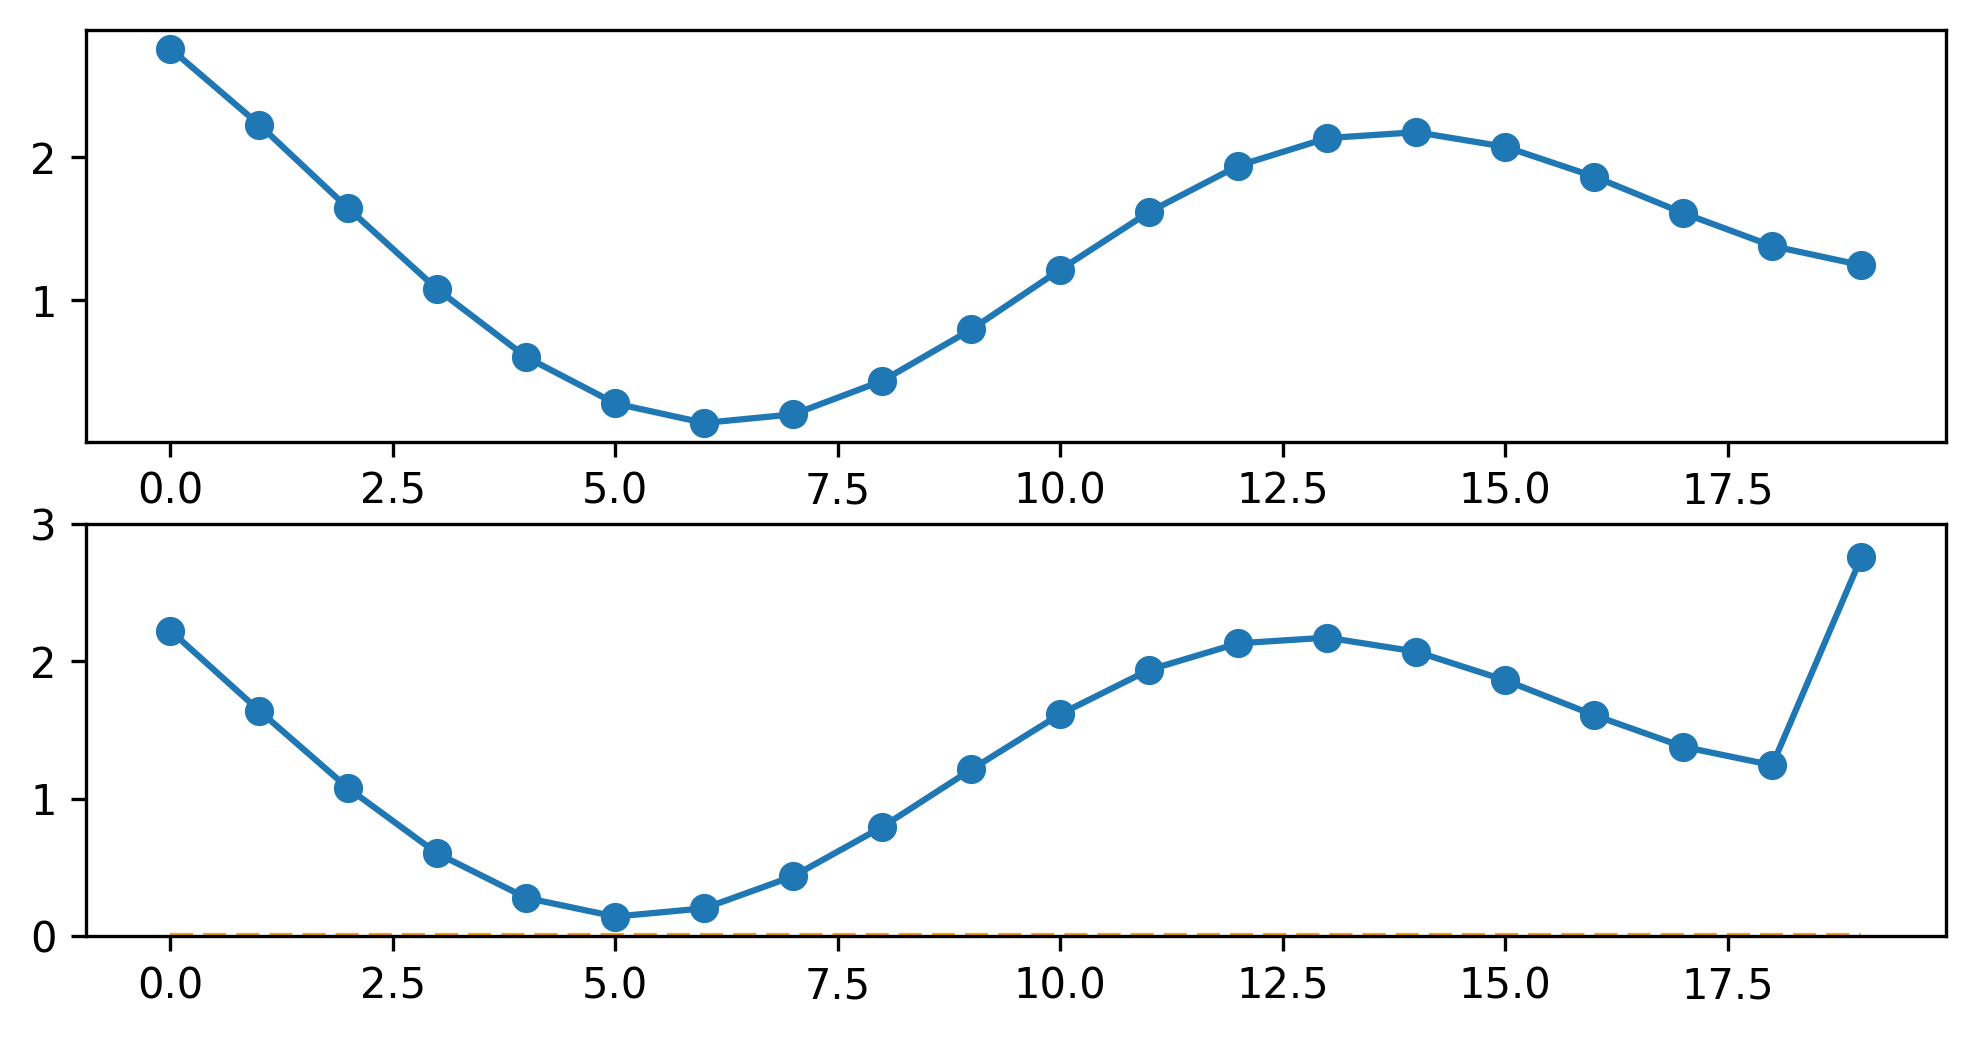

In [12]:
# Convolutions 1D
kernel = np.array([1,-2,1])

x = np.linspace(-1,1,20)
f = np.sin(4*x) + x**2 +1.0

j0=1
fnew = 0*f
for j in range(len(kernel)):
    fnew = np.roll(f,j0-j)*kernel[j]


fig,ax = plt.subplots(ncols=1,nrows=2,figsize=(8,4))
j = np.array(range(20))
ax[0].plot(j,f)
ax[0].scatter(j,f)
ax[1].plot(j,fnew)
ax[1].scatter(j,fnew)
ax[1].set_ylim([0,3])
ax[1].plot(j,0*j,'--',color="orange")
plt.show()
                      

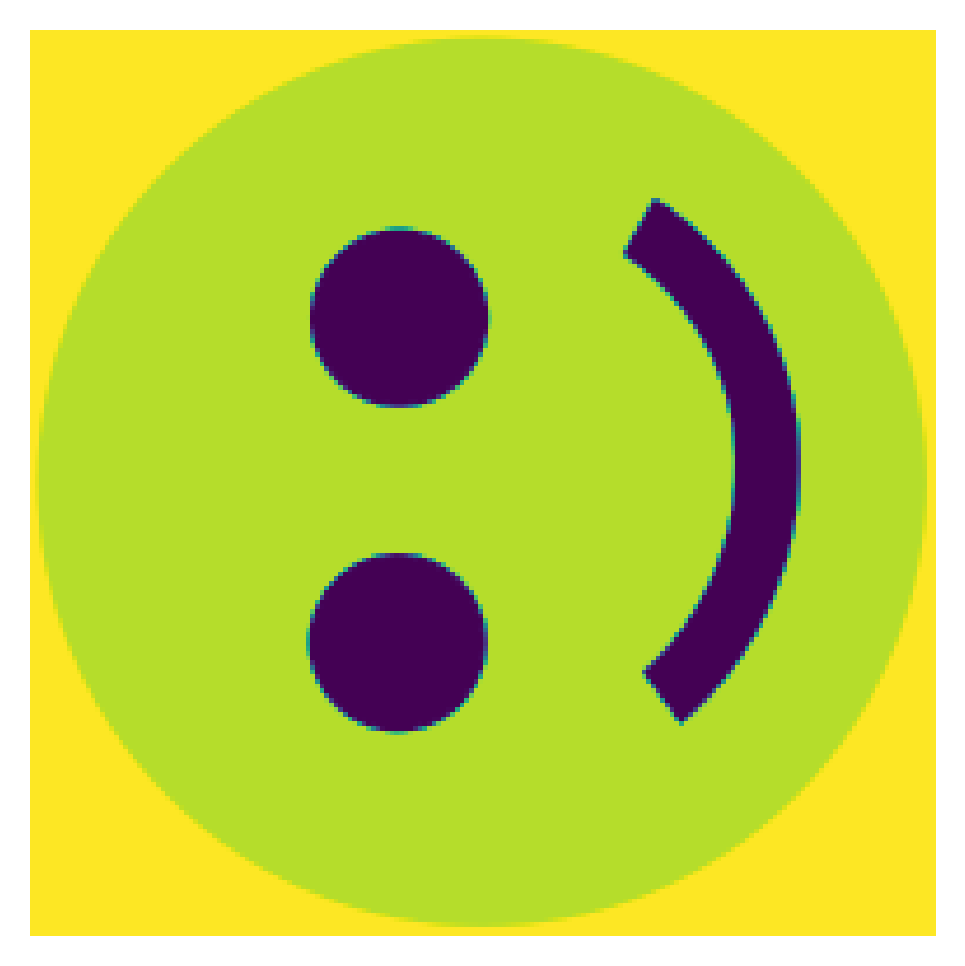

In [17]:
# load the pixel image!
face =imageio.imread('Smiley.png')
pixel_image=np.transpose(face[:,:,0]) # have to transpose...
#pixel_image=pixel_image[:,::1] # and flip... to get the right view!
pixel_image-=pixel_image.min()
pixel_image=(pixel_image.astype(dtype='float'))/pixel_image.max() # normalize between 0 and 1!
Npixels=np.shape(pixel_image)[0] # assuming a square image!

plt.imshow(pixel_image,origin='lower')
plt.axis('off')
plt.show()

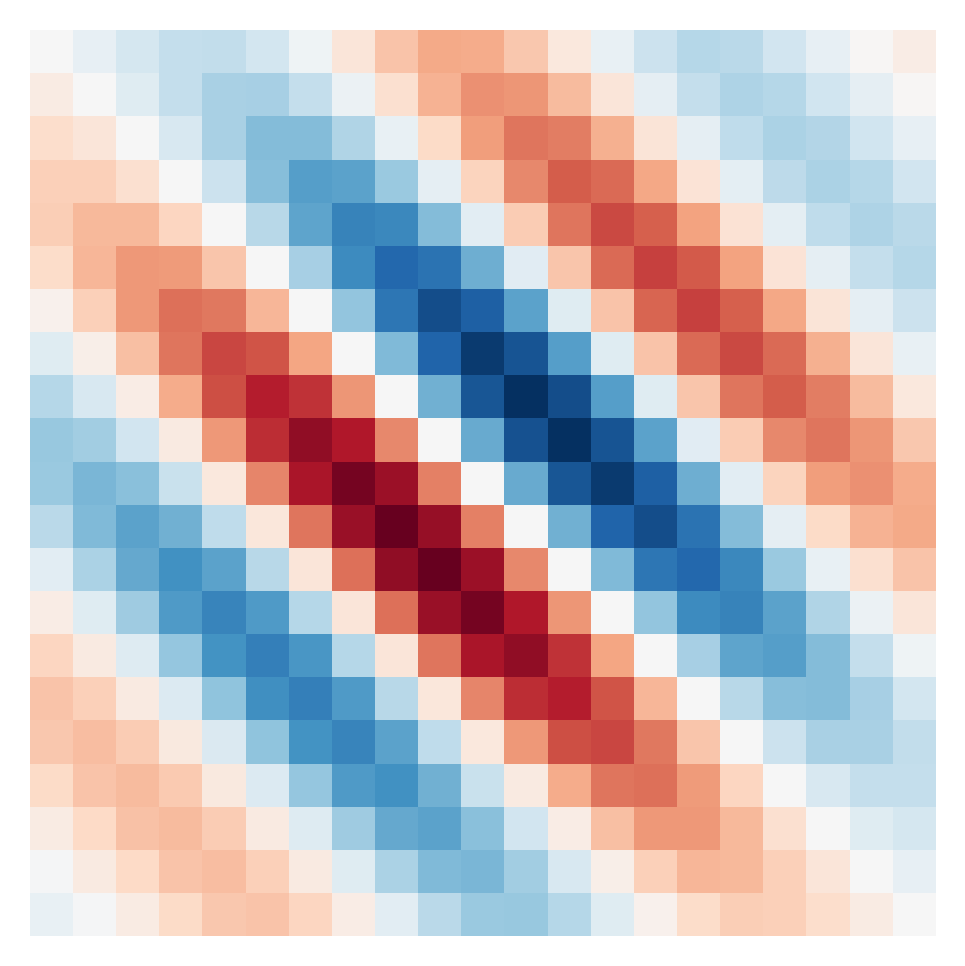

In [14]:
# Convolutions 2D

def my_kernel(x,y):
    return(np.sin(0.5*(x+y))*np.exp(-0.01*(x**2+y**2)))

vals=np.linspace(-10,10,21)
x,y=np.meshgrid(vals,vals)
kernel=my_kernel(x,y)

plt.imshow(kernel,cmap='RdBu',origin='lower')
plt.axis('off')
plt.show()

# x=np.linspace(-1,1,20)
# f=np.sin(

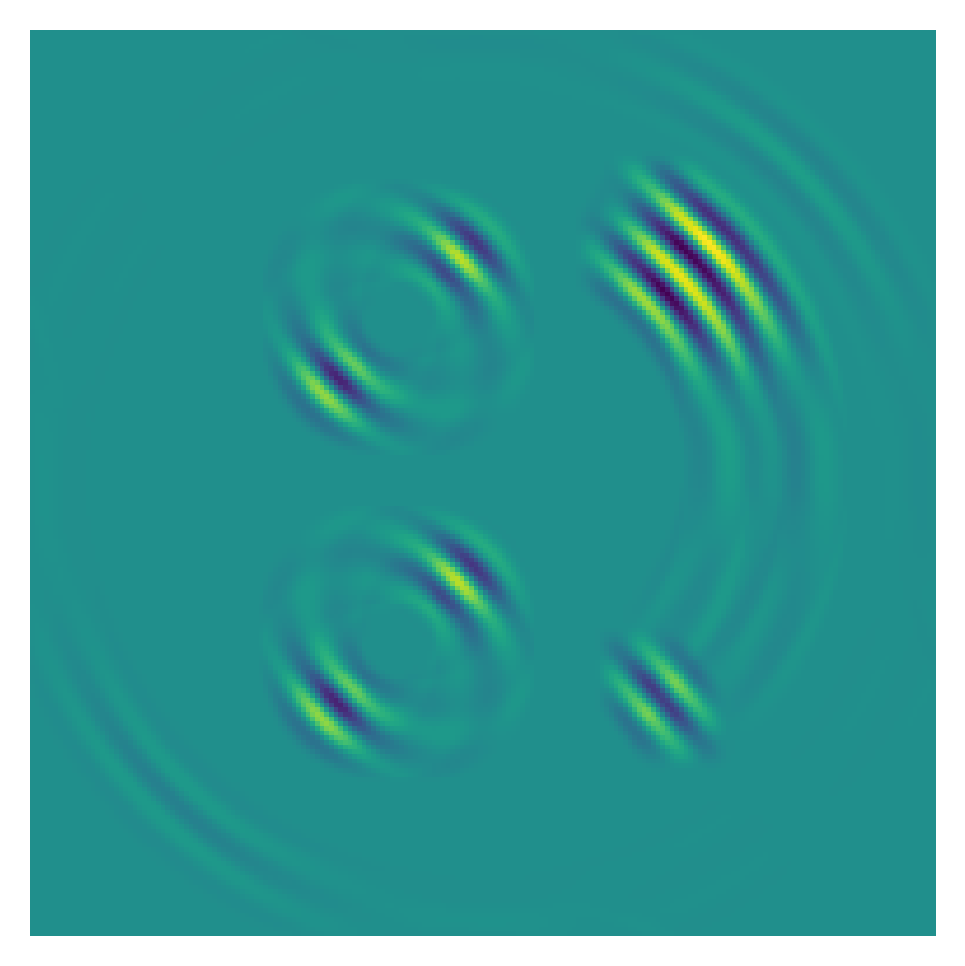

In [15]:
# inefficient convolution
jmid=10

f=pixel_image
fnew=0*f
N=21
for j0 in range(N):
    for j1 in range(N):
        fnew+=np.roll(f,[jmid-j0,jmid-j1],axis=[0,1])*kernel[j0,j1]
        
plt.imshow(fnew,origin='lower')
plt.axis('off')
plt.show()

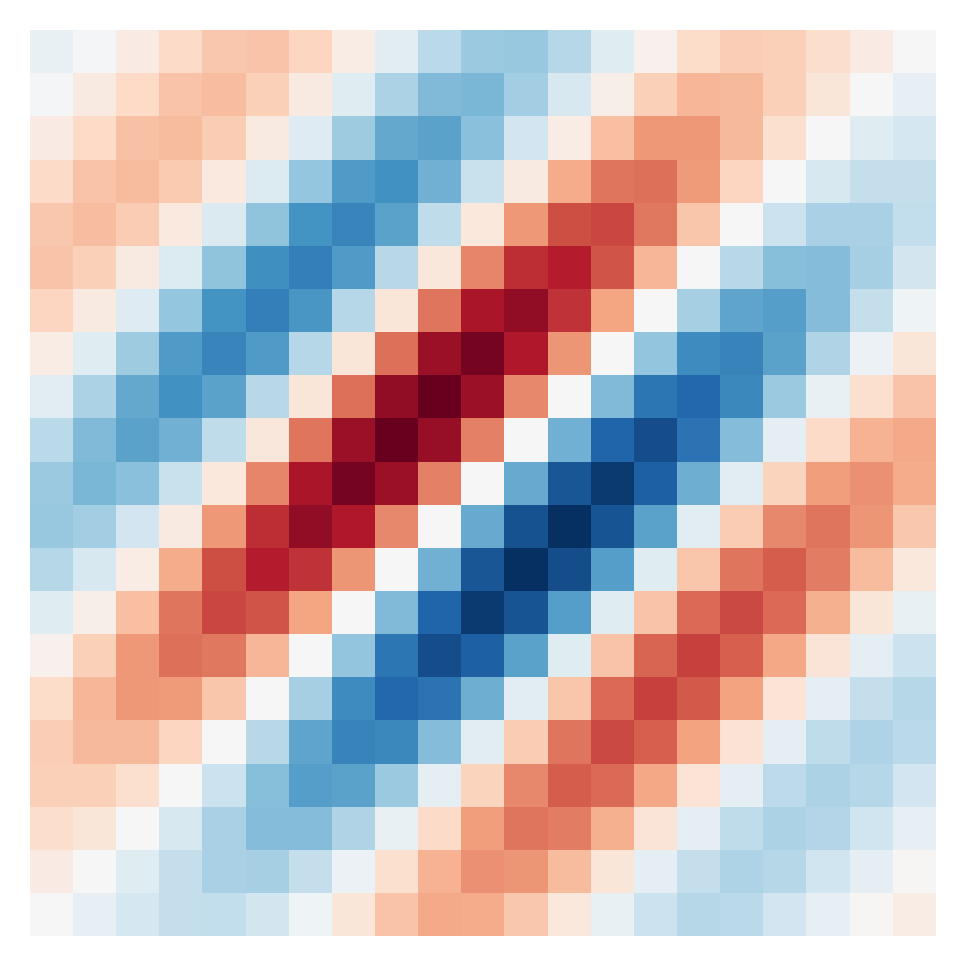

In [18]:
# Convolutions 2D

def my_kernel(x,y):
    return(np.sin(0.5*(x-y))*np.exp(-0.01*(x**2+y**2)))

vals=np.linspace(-10,10,21)
x,y=np.meshgrid(vals,vals)
kernel=my_kernel(x,y)

plt.imshow(kernel,cmap='RdBu',origin='lower')
plt.axis('off')
plt.show()

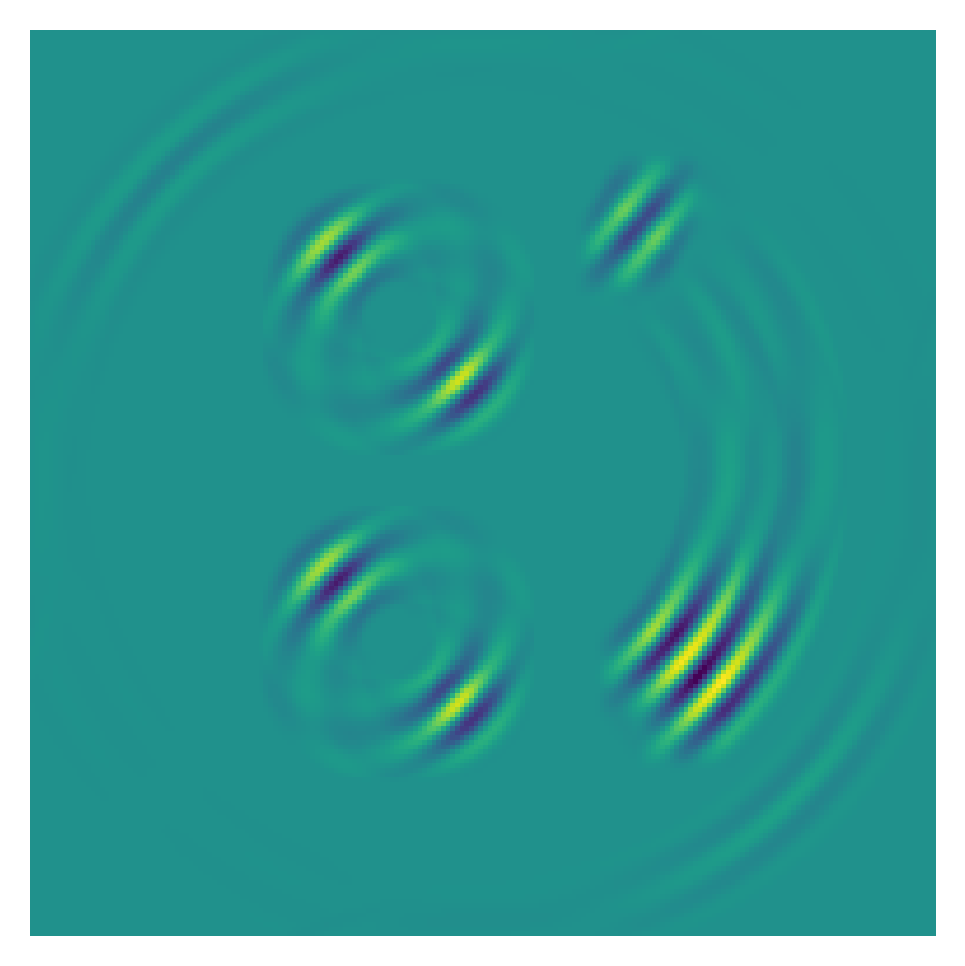

In [19]:
# inefficient convolution
jmid=10

f=pixel_image
fnew=0*f
N=21
for j0 in range(N):
    for j1 in range(N):
        fnew+=np.roll(f,[jmid-j0,jmid-j1],axis=[0,1])*kernel[j0,j1]
        
plt.imshow(fnew,origin='lower')
plt.axis('off')
plt.show()

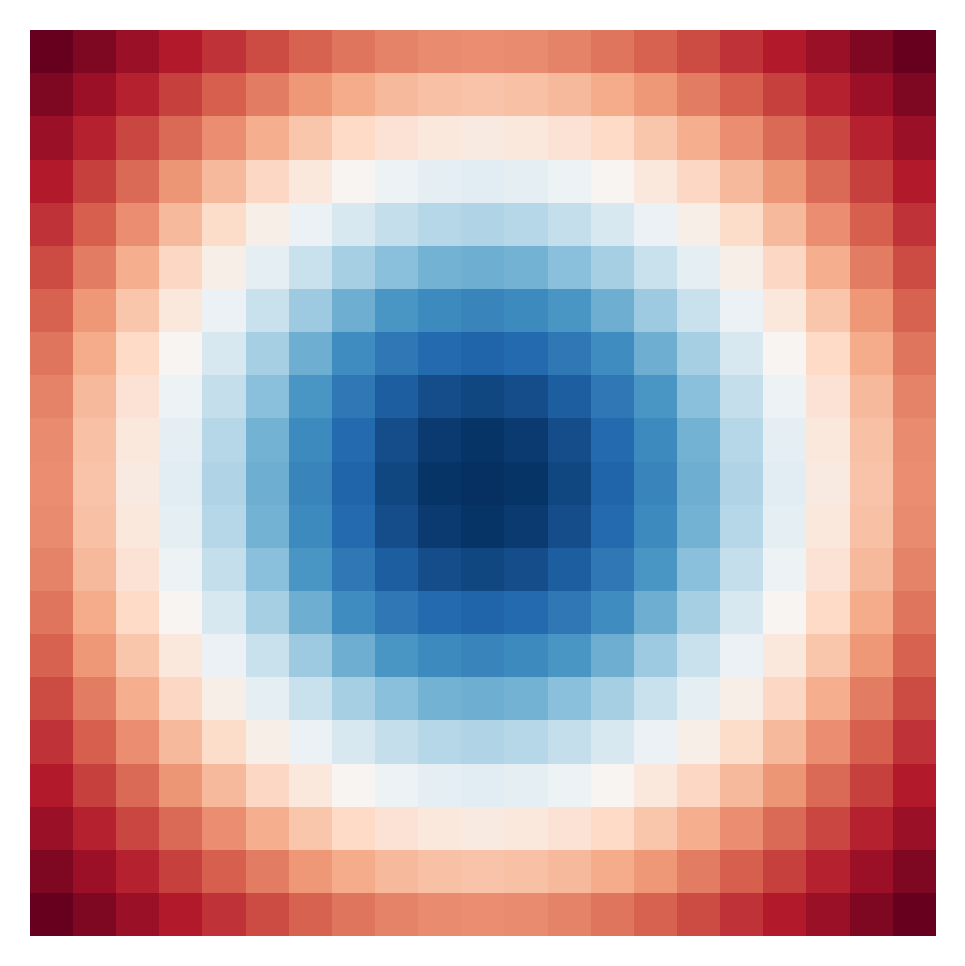

In [23]:
def my_kernel(x,y):
    return(np.exp(-0.01*(x**2+y**2)))

vals=np.linspace(-10,10,21)
x,y=np.meshgrid(vals,vals)
kernel=my_kernel(x,y)

#plt.imshow(kernel,cmap='RdBu',origin='lower',vmin=-1,vmax=1)
plt.imshow(kernel,cmap='RdBu',origin='lower')
plt.axis('off')
plt.show()

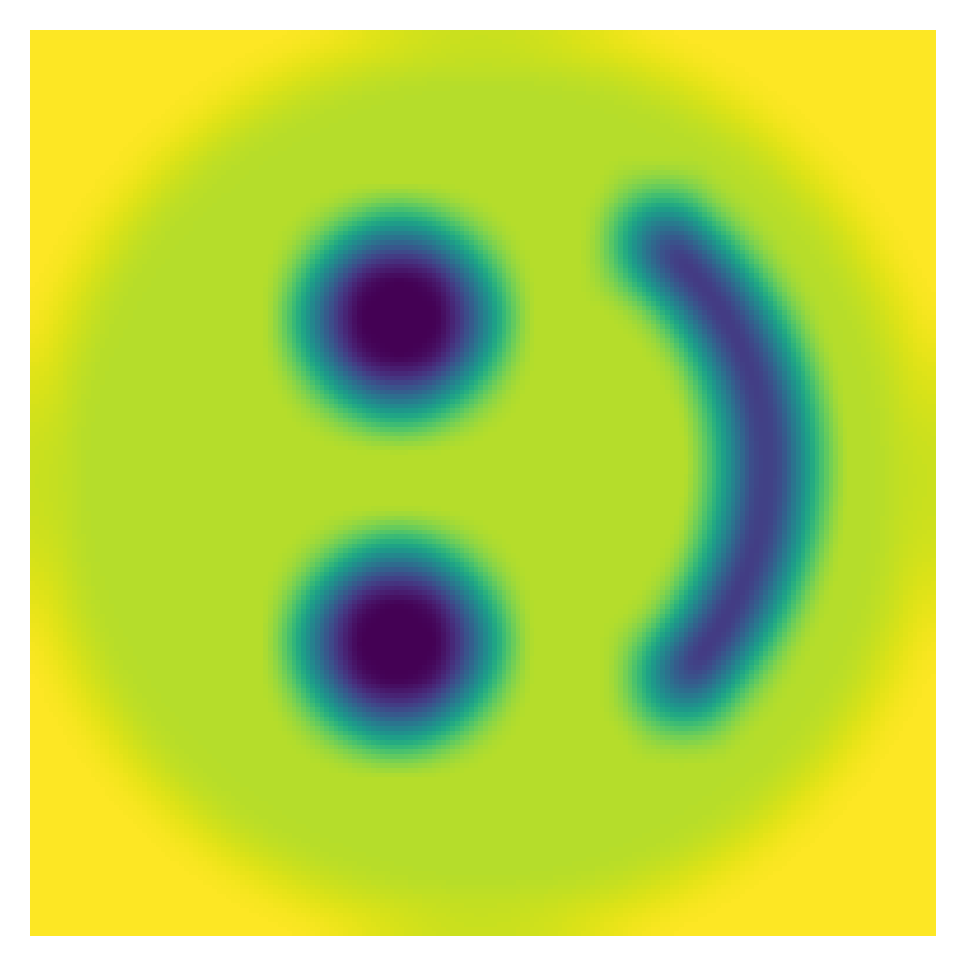

In [24]:
# inefficient convolution
jmid=10

f=pixel_image
fnew=0*f
N=21
for j0 in range(N):
    for j1 in range(N):
        fnew+=np.roll(f,[jmid-j0,jmid-j1],axis=[0,1])*kernel[j0,j1]
        
plt.imshow(fnew,origin='lower')
plt.axis('off')
plt.show()

## Unsuprevised learning 

We have a large set of input data but we dont have labels, or large set of curves experimental data withot labels. We want to extract the crucial features of large training set and it is in general domain of unsupervises learning. 

The example is called autoencoder where the input will be an image and out put is an image. In this challenge we first reduce the resolution until we have very small images what we call it bottleneck, and we up sample again and increase the resolution again. Then to reproduce the input image we have to have some sort of compression. The NN has to find a smart way of encoding all the information that input image has to much less pixel values and then be able to extract this information again in the second part that is called decoder in order to reproduce the image.  

We can use the autoencoder to take a clean image form imput image, we force the autoencoder to invent a way to turn our original noisy image into a nice clean image. 
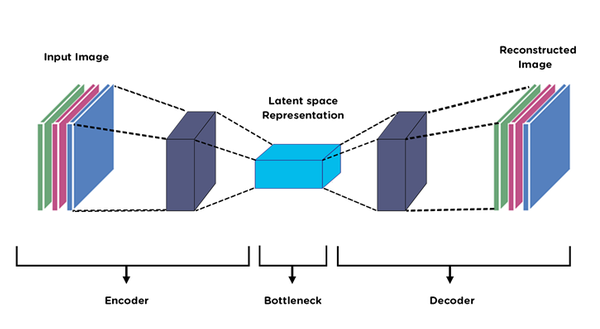

In [28]:
from keras.datasets import fashion_mnist, mnist
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model

import os#,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd# Any results you write to the current directory are saved as output.
from IPython.display import display, Image

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout

# Any results you write to the current directory are saved as output.
from IPython.display import display, Image

In [30]:
# get the data
filname = 'fer2013.csv'

#different labels of images(not useful known about for current problem)
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

#different features names
names=['emotion','pixels','usage']

#Reading data in dataframe
df=pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [31]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X), np.array(Y)
    return X, Y

In [32]:
#extracting data from dataset
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [33]:
X.shape

(35887, 2304)

In [34]:
# keras with tensorflow backend
N, D = X.shape

#reshaping the dataset
X = X.reshape(N, 48, 48, 1)

In [35]:
#splitting data in train, test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [37]:
#Taking 5000 images 

x_train = x_train[:5000]
x_test = x_test[:5000]

In [38]:
x_train.shape

(5000, 48, 48, 1)

In [39]:
#NOrmalizing the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [40]:
#reshaping the images
x_train = np.reshape(x_train, (len(x_train), 48, 48, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 48, 48, 1))  # adapt this if using `channels_first` image data format

In [43]:
#adding noise in data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [44]:
#clipping put data near to 0--->0 aand data near to 1-->1(eg=0.3-->0 or 0.7-->1)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

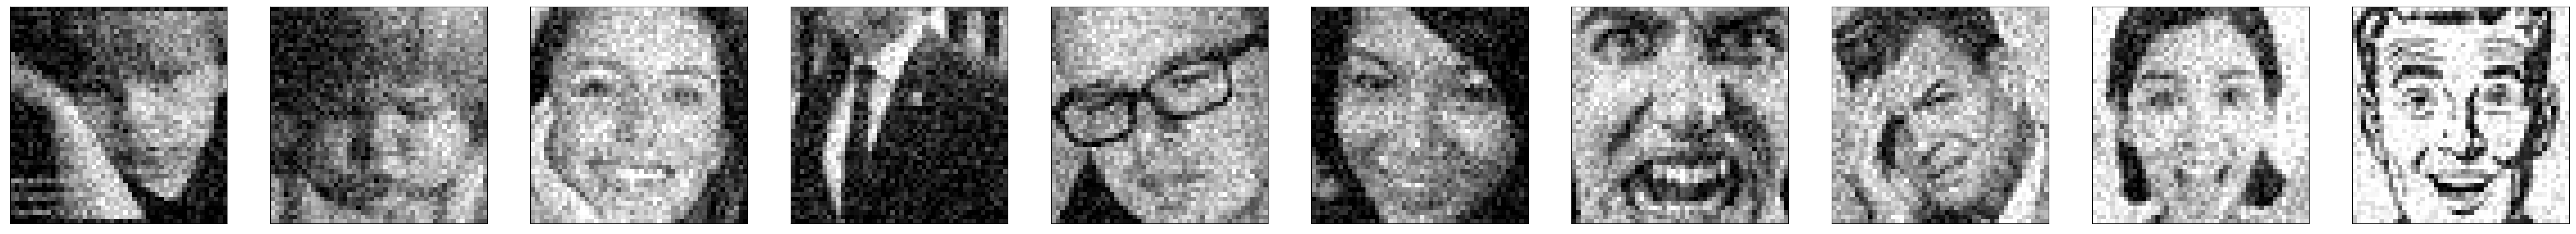

In [45]:
n = 10 #Visualization of 10 Data
plt.figure(figsize=(48, 48))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train_noisy[i].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
input_img = Input(shape=(48, 48, 1)) 


x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)



# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='MSE')


In [47]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248  

In [48]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=35,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/35
79/79 [==============================] - 36s 441ms/step - loss: 0.0246 - val_loss: 0.0139
Epoch 2/35
79/79 [==============================] - 27s 345ms/step - loss: 0.0101 - val_loss: 0.0105
Epoch 3/35
79/79 [==============================] - 28s 357ms/step - loss: 0.0080 - val_loss: 0.0085
Epoch 4/35
79/79 [==============================] - 28s 359ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 5/35
79/79 [==============================] - 27s 347ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 6/35
79/79 [==============================] - 29s 364ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 7/35
79/79 [==============================] - 31s 394ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 8/35
79/79 [==============================] - 27s 340ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 9/35
79/79 [==============================] - 33s 419ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 10/35
79/79 [==============================] - 32s 405ms/step - loss: 0.0056 - val_lo

In [49]:
predict = autoencoder.predict(x_test_noisy)

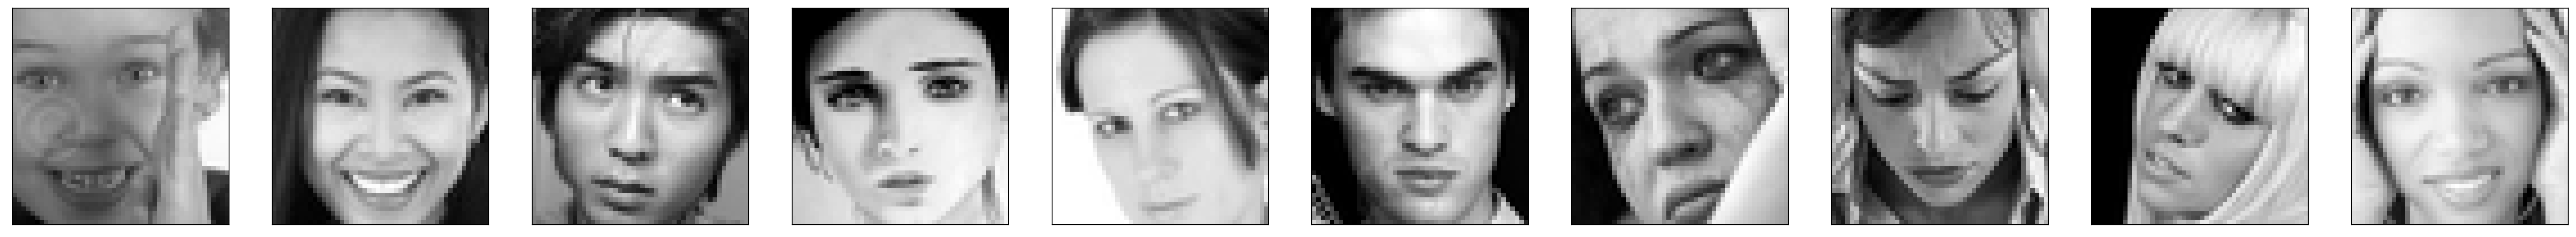

In [50]:
n =10

#Original Test images
plt.figure(figsize=(40, 48))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

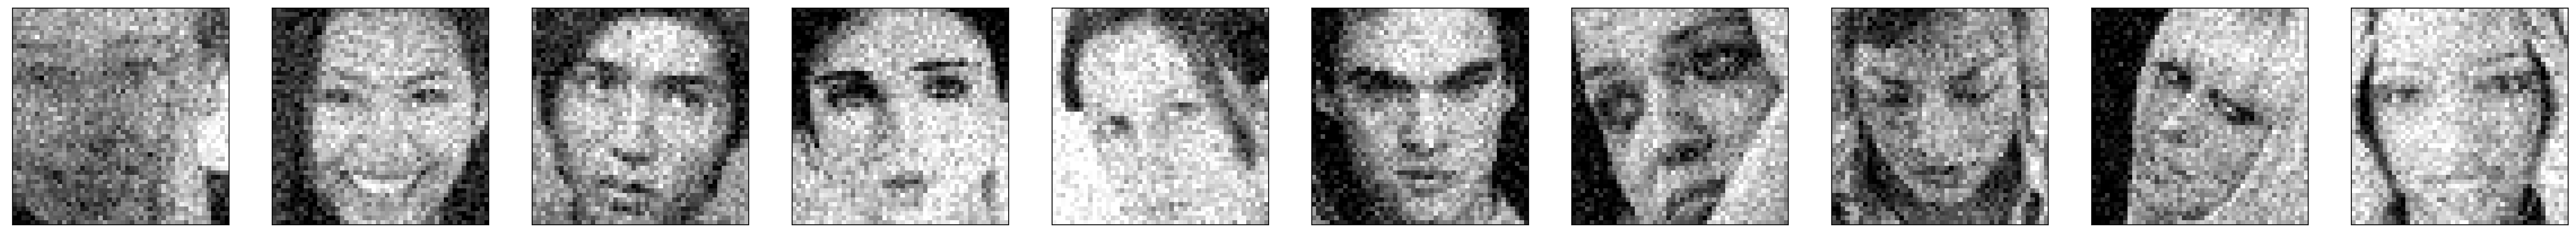

In [51]:
# Noised test images
plt.figure(figsize=(40, 48))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

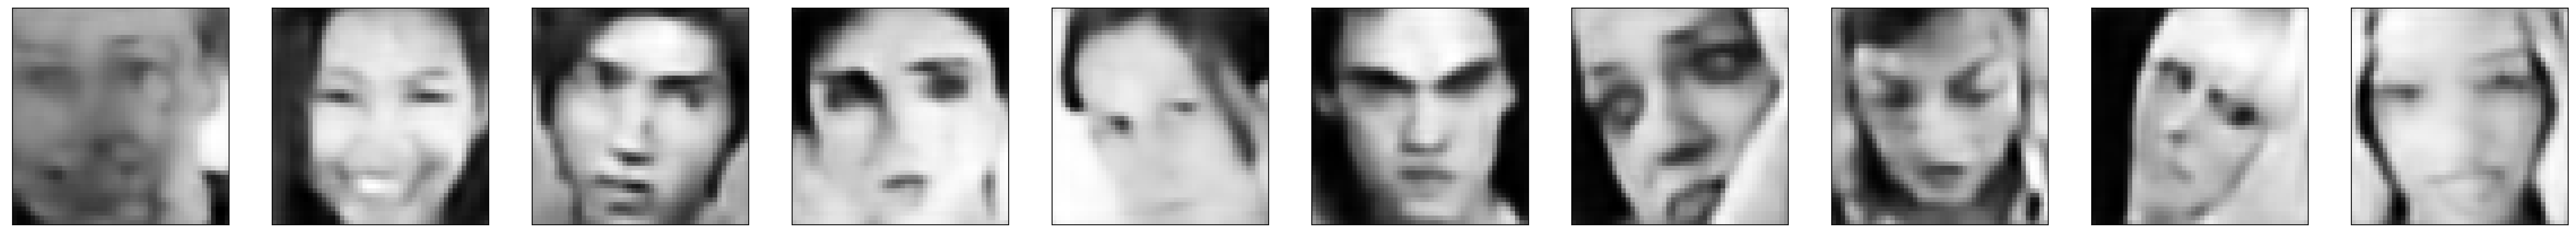

In [52]:
# generated test images
plt.figure(figsize=(40, 48))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(predict[i].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [58]:
# train loss VS validation loss
epochs = range(len(autoencoder.history.history['loss']))

plt.plot(epochs,autoencoder.history.history['loss'],'r', label='train_loss')
plt.plot(epochs,autoencoder.history.history['val_loss'],'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()

KeyError: 'loss'